In [34]:
import tensorflow as tf
import numpy as np
import cv2

import matplotlib.pyplot as plt

layers = tf.keras.layers

# Generic "fit" function
fits a model given by "function" parameterized by O and having desired behavior y

In [2]:
def fit(function, O, y):
    i = 0
    for epoch in range(MAX_EPOCH):

        with tf.GradientTape(persistent=True) as tape:

            tape.watch(O)

            yHat = function(O)
          
            loss = tf.reduce_mean(lossFnc(y, yHat)) 

        grads = tape.gradient(loss, O)
        optimizer.apply_gradients(zip(grads, O))

        if i%100 == 0:
            print('batch : %d of %d (loss = %.4f)'%(i,MAX_EPOCH,loss))

        i = i + 1

## Test fitting 1D model

In [3]:
Np = 100

In [4]:
def gaussian(O):
    
    u1, u2, sig21, sig22, p = tuple(O)
    
    X = np.linspace(-1,1,Np)
    
    g1 = p*tf.exp(-0.5*(X-u1)**2/sig21)
    g2 = (1-p)*tf.exp(-0.5*(X-u2)**2/sig22)
    
    return g1+g2

In [5]:
y = gaussian([-1.2, 0, 2.2**2, 0.8**2, 0.5])

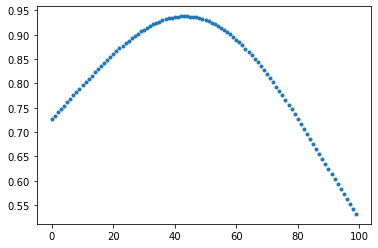

In [6]:
plt.plot(y,'.')

In [7]:
lossFnc = tf.keras.losses.mean_squared_error
#optimizer = optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
optimizer = optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)


MAX_EPOCH = 200

u1 = tf.Variable(0.0)
sig21 = tf.Variable(1.0)

u2 = tf.Variable(0.0)
sig22 = tf.Variable(1.0)

p = tf.Variable(0.0)

O = [u1, u2, sig21, sig22, p]

In [8]:
fit(gaussian, O, y)

yHat = gaussian([u1, u2, sig21, sig22, p])

batch : 0 of 200 (loss = 0.0058)
batch : 100 of 200 (loss = 0.0001)


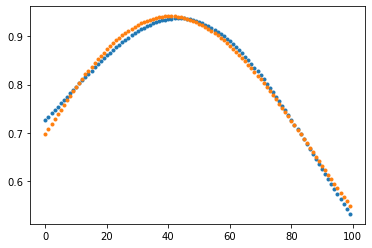

In [11]:
plt.plot(y,'.')
plt.plot(yHat,'.')

# Fit a 2D model

In [97]:
N = 32

def gaussian2D(O):
    u1, u2, S11, S12, S22 = tuple(O)
    
    I = [[0 for x in range(N)] for y in range(N)]
    
    for i in range(N):
        for j in range(N):
            x = tf.constant(-1.0+2.0*i/N)
            y = tf.constant(-1.0+2.0*j/N)
            tmp1 = ((x-u1)**2)*S11
            tmp2 = ((x-u1)*(y-u2))*S12
            tmp3 = ((y-u2)**2)*S22

            I[i][j] = tf.exp(-0.5*(tmp1+tmp2+tmp3) )
    
            
    return I





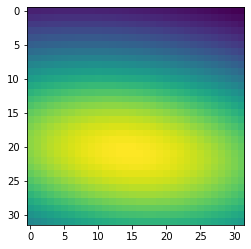

In [98]:
I = gaussian2D([0.3, -0.1, 1.8, -0.3, 0.4])
plt.imshow(I)

(32, 32)

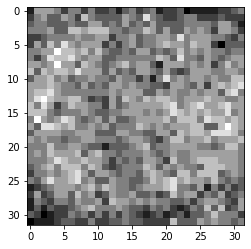

In [133]:
ind = 19
imfilename = '../../results/10-microns particles-60X/crop_centered/crop_centered_' + str(ind) +'.tif'
I = cv2.imread(imfilename, cv2.IMREAD_GRAYSCALE)

new_shape = (32, 32)
I = cv2.resize(I, new_shape, interpolation = cv2.INTER_AREA)
I = I/255.
plt.imshow(I, cmap='gray')
I.shape

In [134]:
lossFnc = tf.keras.losses.mean_squared_error
#optimizer = optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
optimizer = optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)

MAX_EPOCH = 50

u1    = tf.Variable(0.0)
u2    = tf.Variable(0.0)
sig11 = tf.Variable(1.0)
sig22 = tf.Variable(1.0)
sig12 = tf.Variable(1.0)

O = [u1, u2, sig11, sig22, sig12]

In [135]:
fit(gaussian2D, O, I)

batch : 0 of 50 (loss = 0.0885)


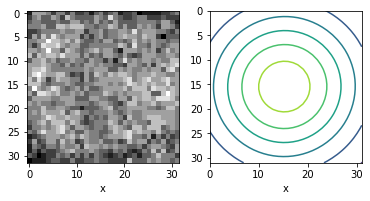

In [136]:
yHat = gaussian2D(O)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(I, cmap='gray')
ax.set_aspect('equal')
ax.set_xlabel('x')

ax = fig.add_subplot(122)
plt.contour(yHat)
ax.invert_yaxis()
ax.set_xlabel('x')
ax.set_aspect('equal')
plt.show()

In [137]:
O

[<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.033128437>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.047747396>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0111654>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.02794158>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9621704>]